In [169]:
import calendar

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [170]:
data = pd.read_csv("../data/uber-raw-data-jul14.csv")
data.head(10)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


In [171]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"])
data.head(10)

,Date/Time,Lat,Lon,Base
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512
5,2014-07-01 00:35:00,40.7487,-73.9869,B02512
6,2014-07-01 00:57:00,40.7444,-73.9961,B02512
7,2014-07-01 00:58:00,40.7132,-73.9492,B02512
8,2014-07-01 01:04:00,40.7590,-73.9730,B02512
9,2014-07-01 01:08:00,40.7601,-73.9823,B02512


In [172]:
#  convert date/time to datetime
hourly_data = data["Date/Time"].dt.floor("1h").value_counts()
# sort the data
hourly_data = hourly_data.sort_index()
hourly_data.head(10)

Date/Time
2014-07-01 00:00:00     216
2014-07-01 01:00:00     111
2014-07-01 02:00:00      82
2014-07-01 03:00:00     134
2014-07-01 04:00:00     223
2014-07-01 05:00:00     348
2014-07-01 06:00:00     715
2014-07-01 07:00:00    1196
2014-07-01 08:00:00    1076
2014-07-01 09:00:00     885
Name: count, dtype: int64

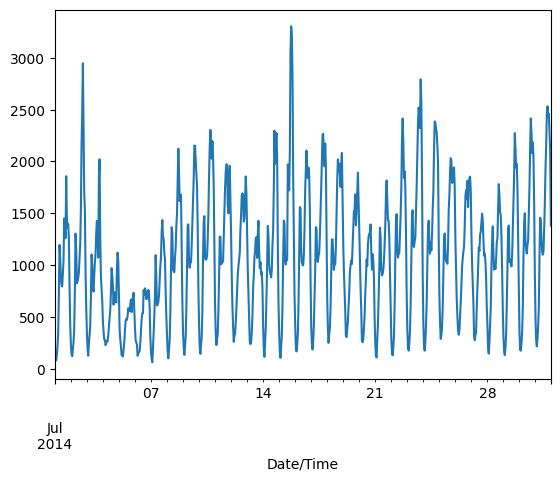

In [173]:
hourly_data.plot(kind="line")
plt.show()

In [174]:
# split date into week day, hour date
weekly_data = pd.DataFrame()
weekly_data["Week Day"] = data["Date/Time"].dt.weekday
weekly_data["Hour"] = data["Date/Time"].dt.hour
weekly_data["Date"] = data["Date/Time"].dt.date
weekly_data.head(10)

,Week Day,Hour,Date
0,1,0,2014-07-01
1,1,0,2014-07-01
2,1,0,2014-07-01
3,1,0,2014-07-01
4,1,0,2014-07-01
5,1,0,2014-07-01
6,1,0,2014-07-01
7,1,0,2014-07-01
8,1,1,2014-07-01
9,1,1,2014-07-01


In [175]:
# Get week day name
weekly_data["Week Day"] = weekly_data["Week Day"].apply(lambda x: calendar.day_name[x])
weekly_data.head(10)

,Week Day,Hour,Date
0,Tuesday,0,2014-07-01
1,Tuesday,0,2014-07-01
2,Tuesday,0,2014-07-01
3,Tuesday,0,2014-07-01
4,Tuesday,0,2014-07-01
5,Tuesday,0,2014-07-01
6,Tuesday,0,2014-07-01
7,Tuesday,0,2014-07-01
8,Tuesday,1,2014-07-01
9,Tuesday,1,2014-07-01


In [176]:
#  group by date, weekday, hour
weekly_data = (
    weekly_data.groupby(["Date", "Week Day", "Hour"])
    .size()
    .reset_index()
    .rename(columns={0: "Size"})
)
weekly_data.head(10)

,Date,Week Day,Hour,Size
0,2014-07-01,Tuesday,0,216
1,2014-07-01,Tuesday,1,111
2,2014-07-01,Tuesday,2,82
3,2014-07-01,Tuesday,3,134
4,2014-07-01,Tuesday,4,223
5,2014-07-01,Tuesday,5,348
6,2014-07-01,Tuesday,6,715
7,2014-07-01,Tuesday,7,1196
8,2014-07-01,Tuesday,8,1076
9,2014-07-01,Tuesday,9,885


In [177]:
#  get the mean for each week day
weekly_data = weekly_data.groupby(["Week Day", "Hour"]).mean(["Size"])
weekly_data.head(10)

Size
Week Day Hour         
Friday   0      615.00
         1      385.25
         2      264.75
         3      307.50
         4      339.75
         5      497.25
         6      736.75
         7     1008.00
         8     1038.00
         9      907.75

In [178]:
# unstack the data
weekly_data = weekly_data.unstack(level=0)
weekly_data.head(10)

Size                                                      
Week Day   Friday   Monday Saturday   Sunday Thursday Tuesday Wednesday
Hour                                                                   
0          615.00   315.00  1110.25  1090.00    430.0   301.8     354.6
1          385.25   153.25   788.25   829.50    231.4   155.8     193.2
2          264.75   109.75   580.00   638.25    171.0   111.2     156.0
3          307.50   254.75   426.00   477.00    256.6   187.0     224.0
4          339.75   403.75   271.75   245.50    376.8   296.6     326.0
5          497.25   615.25   274.25   231.25    586.2   546.0     559.8
6          736.75   911.00   303.50   256.75    959.2   962.2    1003.4
7         1008.00  1266.50   398.50   316.25   1341.8  1350.0    1425.8
8         1038.00  1199.25   525.25   466.75   1336.6  1332.4    1425.0
9          907.75   923.00   667.00   657.50   1077.0  1012.2    1083.8

In [179]:
# change the order of the columns
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
# Create a list of tuples for the new column order
new_column_order = [("Size", day) for day in days_order]
weekly_data_ordered = weekly_data.reindex(columns=new_column_order)
weekly_data_ordered.head(10)

Size                                                      
Week Day   Monday Tuesday Wednesday Thursday   Friday Saturday   Sunday
Hour                                                                   
0          315.00   301.8     354.6    430.0   615.00  1110.25  1090.00
1          153.25   155.8     193.2    231.4   385.25   788.25   829.50
2          109.75   111.2     156.0    171.0   264.75   580.00   638.25
3          254.75   187.0     224.0    256.6   307.50   426.00   477.00
4          403.75   296.6     326.0    376.8   339.75   271.75   245.50
5          615.25   546.0     559.8    586.2   497.25   274.25   231.25
6          911.00   962.2    1003.4    959.2   736.75   303.50   256.75
7         1266.50  1350.0    1425.8   1341.8  1008.00   398.50   316.25
8         1199.25  1332.4    1425.0   1336.6  1038.00   525.25   466.75
9          923.00  1012.2    1083.8   1077.0   907.75   667.00   657.50

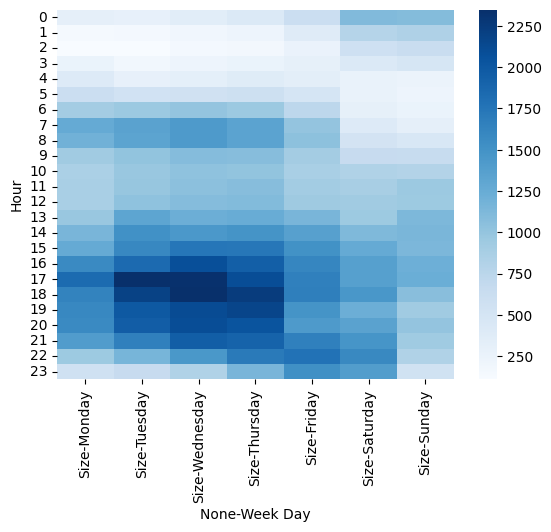

In [183]:
sns.heatmap(weekly_data_ordered, cmap="Blues")
plt.show()
